In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
%matplotlib inline 
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
len(train_df)

42000

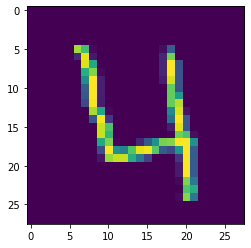

In [4]:
index = 3
image = train_df.drop('label',axis=1).values
plt.imshow(image[index].reshape(28,28))

In [5]:
def convert_to_one_hot(Y, C):
    one_hot = torch.zeros(Y.shape[0],10)
    for label,i in zip(Y,range(Y.shape[0])):
        one_hot[i][label] = 1
    return one_hot

In [6]:
#places x and y in tensors
Y_train = torch.tensor(train_df.label.values)
X_train_orig = torch.tensor(train_df.drop('label',axis=1).values)
#flatten images
X_train_flatten = X_train_orig.reshape((-1,28*28))
#normalize
X_train = X_train_flatten/255.
#convert labels to one hot tensors
Y_train = convert_to_one_hot(Y_train,10)
Y_train,X_train.shape

(tensor([[0., 1., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]),
 torch.Size([42000, 784]))

In [7]:
#model
class ApdNet(torch.nn.Module):
    def __init__(self):
        super(ApdNet, self).__init__()
        self.l1 = nn.Linear(784,128)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128,10)
    def forward(self,x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        return x

In [ ]:
#training
model = ApdNet()
BS = 64
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(),lr=0.001,momentum=0)
losses, accuracies = [],[]
for i in (t := trange(1000)):
    samp = np.random.randint(0,X_train.shape[0], size=(BS))
    X = X_train[samp].reshape((-1,28*28)).float()
    Y = Y_train[samp].long()
    optim.zero_grad()
    out = model(X)
    cat = torch.argmax(out,dim=1)
    accuracy = (cat == Y).float().mean()
    loss = loss_function(out,Y)
    loss.backward()
    optim.step()
    loss, accuracy = loss.item(),accuracy.item()
    losses.append(loss)
    accuracies.append(accuracy)
print(losses)
print(accuracies)

  0%|          | 0/1000 [00:00<?, ?it/s]